In [4]:
import scipy.misc
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import myfun
import cv2
import math

In [5]:
img_o = scipy.misc.imread('test/baboon.bmp',flatten=True, mode='YCbCr').astype(np.float)
img = myfun.create_LR(img_o,4)
img_size = 32
stride = 16
h,w = img.shape
piece_wise = []
for x in range(0, h-img_size+1, stride):
    for y in range(0, w-img_size+1, stride):
        sub_input = img[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
        piece_wise.append(sub_input)
input_ = np.asarray(piece_wise)        
srcnn = load_model('SRCNN_model.h5')
hat = srcnn.predict(input_)
img_re = np.zeros(img.shape)
i=0
for x in range(0, h-img_size+1, stride):
    for y in range(0, w-img_size+1, stride):
        img_re[x:x+img_size, y:y+img_size] = hat[i].reshape(img_size,img_size)
        i += 1

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Text(0.5,1,'SRCNN')

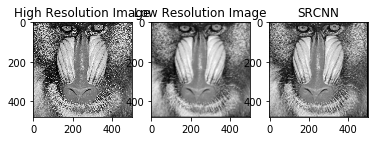

In [6]:
#img_re = img_re
#img_rgb = myfun.color_convert(img_re.astype(np.uint8))
cv2.imwrite('restored.bmp',img_re)
cv2.imwrite('HR.bmp',img_o)
img_save = (img*255).astype(np.uint8)
cv2.imwrite('blurred.bmp',img_save)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img_o,cmap = 'gray')
plt.title('High Resolution Image')
plt.subplot(1,3,2)
plt.imshow(img_save, cmap = 'gray')
plt.title('Low Resolution Image')
plt.subplot(1,3,3)
plt.imshow(img_re, cmap = 'gray')
plt.title('SRCNN')

In [7]:
# Here is the function for PSNR calculation
def PSNR(pred, gt, shave_border=0):
    height, width = pred.shape[:2]
    pred = pred[shave_border:height - shave_border, shave_border:width - shave_border]
    gt = gt[shave_border:height - shave_border, shave_border:width - shave_border]
    imdff = pred - gt
    rmse = math.sqrt(np.mean(imdff ** 2))
    if rmse == 0:
        return 100
    return 20 * math.log10(255.0 / rmse)

In [8]:
# Calculate the PNSR for vdsr prediction
psnr_predicted = PSNR(img_o, img_re)
print('psnr for SRCNN is {}dB'.format(psnr_predicted))

psnr for SRCNN is 19.916331062801355dB
